# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [83]:
import pandas as pd

df = pd.read_csv("../data/data.csv")

clean_df = df.copy()
clean_df = clean_df[clean_df["Area"] > 0]
clean_df = clean_df[clean_df["Price"] > 0]
clean_df = clean_df[clean_df["Minutes to metro"] >= 0]
clean_df = clean_df[clean_df["Floor"] > clean_df["Number of floors"]]
clean_df["price_per_m2"] = clean_df["Price"] / clean_df["Area"]

initial_rows = len(df)
final_rows = len(clean_df)
removed = initial_rows - final_rows

print("Initial rows: ", initial_rows)
print("Final rows: ", final_rows)
print("Removed rows: ", removed)

clean_df.head()

Initial rows:  22676
Final rows:  1657
Removed rows:  21019


,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation,price_per_m2
4353,73854000.0,Secondary,Арбатская,6.0,Moscow,1.0,77.4,14.6,36.9,5.0,4,Without renovation,954186.046512
4417,21200000.0,Secondary,Марьина Роща,5.0,Moscow,1.0,43.0,21.1,9.8,16.0,5,Designer,493023.255814
4460,19100000.0,Secondary,Народное Ополчение,12.0,Moscow,1.0,42.4,14.5,15.4,18.0,5,Without renovation,450471.698113
4540,15600000.0,Secondary,Люблино,10.0,Moscow,1.0,41.0,22.0,12.0,18.0,17,Cosmetic,380487.804878
4637,14800000.0,Secondary,Аминьевская,14.0,Moscow,1.0,45.1,24.9,11.6,18.0,17,European-style renovation,328159.645233


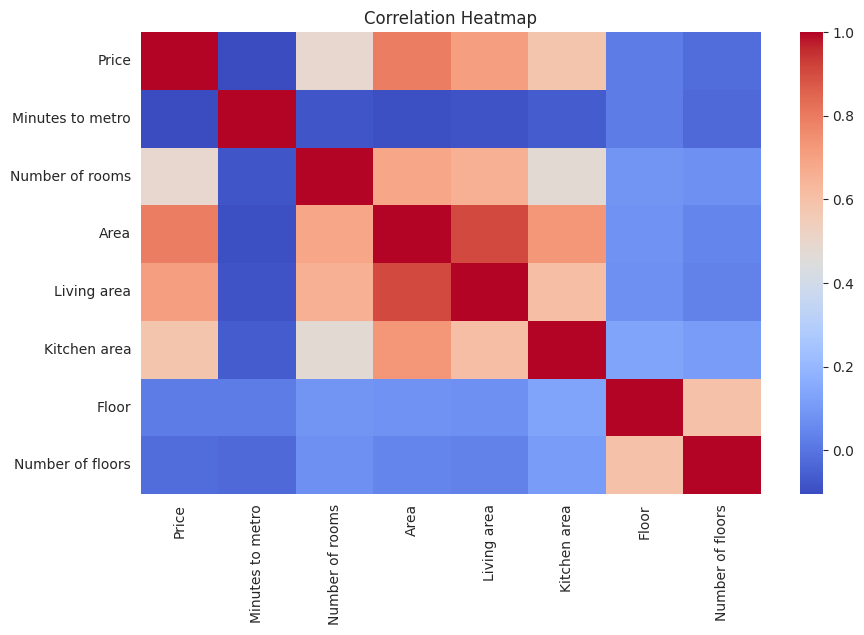

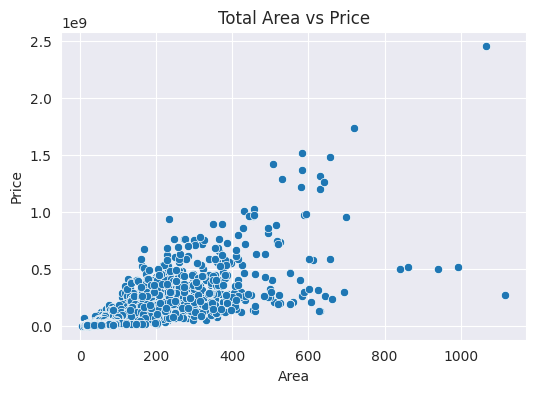

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr(numeric_only=True)
corr['Price'].sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Area'], y=df['Price'])
plt.title("Total Area vs Price")
plt.show()

In [85]:
corr = clean_df.corr(numeric_only=True)
print("Top correlations with Price: ")
print(corr["Price"].abs().sort_values(ascending=False).head(10))
print()
print("Top correlations with price_per_m2: ")
print(corr["price_per_m2"].abs().sort_values(ascending=False).head(10))
print()

high_pairs = []
for i in corr.columns:
    for j in corr.columns:
        if i != j and abs(corr.loc[i, j]) > 0.85:
            high_pairs.append((i, j, corr.loc[i, j]))

high_pairs[:10]

Top correlations with Price: 
Price               1.000000
price_per_m2        0.801195
Living area         0.771675
Area                0.766150
Number of rooms     0.495095
Kitchen area        0.390174
Number of floors    0.190716
Minutes to metro    0.141786
Floor               0.094991
Name: Price, dtype: float64

Top correlations with price_per_m2: 
price_per_m2        1.000000
Price               0.801195
Living area         0.508214
Area                0.498373
Number of floors    0.315229
Number of rooms     0.289764
Kitchen area        0.272368
Minutes to metro    0.188838
Floor               0.064643
Name: price_per_m2, dtype: float64



[('Area', 'Living area', np.float64(0.9549955931591135)),
 ('Living area', 'Area', np.float64(0.9549955931591135))]

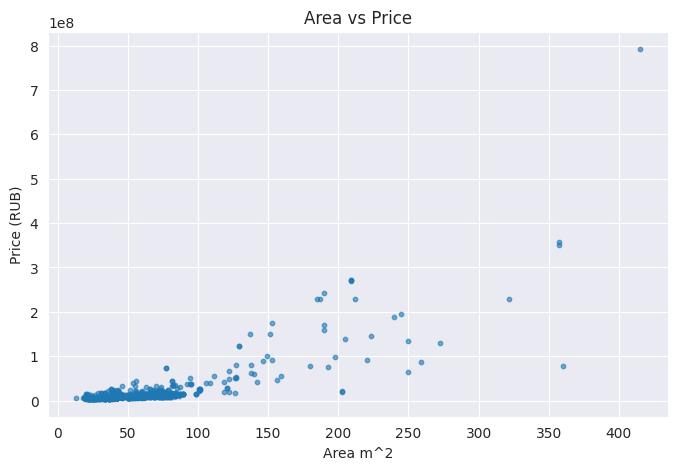

In [86]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(clean_df["Area"], clean_df["Price"], s=10, alpha=0.6)
plt.xlabel("Area m^2")
plt.ylabel("Price (RUB)")
plt.title("Area vs Price")
plt.show()

In [87]:
q1 = clean_df["price_per_m2"].quantile(0.25)
q3 = clean_df["price_per_m2"].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5*iqr
luxury_threshold = q3 + 1.5*iqr

outliers = clean_df[(clean_df["price_per_m2"] < lower)]
print("Outlier count: ", len(outliers))
outliers.head()

clean_df["is_luxury"] = (clean_df["price_per_m2"] > luxury_threshold).astype(int)
luxury_count = clean_df["is_luxury"].sum()
luxury_threshold, luxury_count

Outlier count:  0


(np.float64(277500.0), np.int64(173))

In [88]:
clean_df["floor_ratio"] = clean_df["Floor"] / clean_df["Number of floors"]
clean_df["is_top_floor"] = (clean_df["Floor"] == clean_df["Number of floors"]).astype(int)
clean_df["is_near_metro"] = (clean_df["Minutes to metro"] <= 5).astype(int)

In [89]:
clean_df = pd.get_dummies(clean_df, drop_first=True)

In [90]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(clean_df, test_size=0.2, random_state=42)

In [91]:
from sklearn.linear_model import LinearRegression

X_train = train_set.drop("Price", axis=1)
y_train = train_set["Price"]

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [92]:
from sklearn.metrics import mean_squared_error
import numpy as np

preds = model.predict(X_train)
mse  = mean_squared_error(y_train, preds)
rmse = np.sqrt(mse)
rmse

np.float64(3790194.0108634196)

In [93]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

preds = tree.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, preds))
rmse

np.float64(0.0)

In [94]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

forest =  RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
forest.fit(X_train, y_train)

preds = model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, preds))
rmse

np.float64(3790194.0108634196)

In [95]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    forest, X_train, y_train,
    scoring="neg_mean_squared_error",
    cv=5
)

rmse_scores = np.sqrt(-scores)
rmse_scores.mean(), rmse_scores.std()

(np.float64(11331305.84012959), np.float64(11813009.816257123))

In [96]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

X = clean_df.drop("Price", axis=1)
y = clean_df["Price"]

num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

In [97]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols),
])

In [98]:
housing_prepared = full_pipeline.fit_transform(X)

In [99]:
# forest.fit(housing_prepared, y)
#
# preds_forest = tree.predict(housing_prepared)
# mse_forest = mean_squared_error(y, preds_forest)
# rmse_forest = np.sqrt(mse_forest)
# rmse_forest

In [100]:
X = clean_df.drop("Price", axis=1)
y = clean_df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
housing_train_prepared = full_pipeline.fit_transform(X_train)
housing_test_prepared = full_pipeline.transform(X_test)

In [102]:
forest_reg = RandomForestRegressor(
    n_estimators=200, random_state=42
)

forest_reg.fit(housing_train_prepared, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [103]:
test_preds = forest_reg.predict(housing_test_prepared)

test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
test_rmse

np.float64(5387346.503855631)

In [104]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

forest_reg = RandomForestRegressor(n_estimators=300, random_state=42)
forest_reg.fit(housing_train_prepared, y_train_log)

test_preds_log = forest_reg.predict(housing_test_prepared)

test_rmse_log = np.sqrt(mean_squared_error(y_test_log, test_preds_log))
test_rmse_log

np.float64(0.07930333203862257)

In [105]:
import joblib

joblib.dump(forest_reg, "../models/moscow_forest_model.pkl")
joblib.dump(full_pipeline, "../models/moscow_full_pipeline.pkl")

['moscow_full_pipeline.pkl']

In [106]:
def prepare_user_input(input_df, full_features):
    user_df = pd.DataFrame(np.zeros((1, len(full_features))), columns=full_features)

    if 'Area' in input_df.columns and 'Area' in user_df.columns:
        user_df['Area'] = input_df['Area']
    if 'Floor' in input_df.columns and 'Floor' in user_df.columns:
        user_df['Floor'] = input_df['Floor']
    if 'Number of floors' in input_df.columns and 'Number of floors' in user_df.columns:
        user_df['Number of floors'] = input_df['Number of floors']
    if 'Number of rooms' in input_df.columns and 'Number of rooms' in user_df.columns:
        user_df['Number of rooms'] = input_df['Number of rooms']
    if 'is_luxury' in input_df.columns and 'is_luxury' in user_df.columns:
        user_df['is_luxury'] = input_df['is_luxury']
    if 'Minutes to metro' in input_df.columns and 'Minutes to metro' in user_df.columns:
        user_df['Minutes to metro'] = input_df['Minutes to metro']

        # Calculate derived features
    user_df['floor_ratio'] = user_df['Floor'] / user_df['Number of floors']
    user_df['is_top_floor'] = (user_df['Floor'] == user_df['Number of floors']).astype(int)
    user_df['is_near_metro'] = (user_df['Minutes to metro'] <= 10).astype(int)

    # Set default values for other features
    user_df['Living area'] = user_df['Area'] * 0.7  # Estimate living area as 70% of total area
    user_df['Kitchen area'] = user_df['Area'] * 0.15  # Estimate kitchen area as 15% of total area
    user_df['price_per_m2'] = 0  # This will be handled by the model
    user_df['Apartment type_Secondary'] = 1  # Assuming secondary market

    return user_df

In [107]:
print(clean_df.columns.tolist())


['Price', 'Minutes to metro', 'Number of rooms', 'Area', 'Living area', 'Kitchen area', 'Floor', 'Number of floors', 'price_per_m2', 'is_luxury', 'floor_ratio', 'is_top_floor', 'is_near_metro', 'Apartment type_Secondary', 'Metro station_Аминьевская', 'Metro station_Аннино', 'Metro station_Арбатская', 'Metro station_Белокаменная', 'Metro station_Беломорская', 'Metro station_Белорусская', 'Metro station_Битца', 'Metro station_Борисово', 'Metro station_Ботанический сад', 'Metro station_Братиславская', 'Metro station_Волжская', 'Metro station_Депо', 'Metro station_Динамо', 'Metro station_Домодедовская', 'Metro station_Жулебино', 'Metro station_ЗИЛ', 'Metro station_Зябликово', 'Metro station_Кантемировская', 'Metro station_Каширская', 'Metro station_Котельники', 'Metro station_Красногвардейская', 'Metro station_Красносельская', 'Metro station_Кропоткинская', 'Metro station_Крымская', 'Metro station_Кузнецкий мост', 'Metro station_Кунцевская', 'Metro station_Локомотив', 'Metro station_Ломоно